In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.utils import shuffle

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [222]:
df = pd.read_csv('AB_NYC_2019.txt')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [224]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

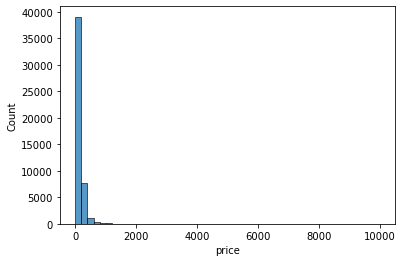

In [225]:
sns.histplot(df.price, bins=50)

The graph illustrates what can be seen in the data summary beforehand for price - it has a very long tail (max 10000).

In [226]:
cols = ['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

df[cols].head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [227]:
print(cols)

['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [228]:
df = df[cols].copy()
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [229]:
df.isnull().sum()
df.reviews_per_month.isnull().sum()/len(df)*100

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

20.55833929849678

Therefore, reviews_per_month has 10052 missing values, i.e. ~21% of the total.

In [230]:
df.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

The value for minimum_nights 50th percentile is 3.

## Split the data

* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the np.log1p() function.

In [231]:
# Shuffling and reseting index
df.head()
# df = shuffle(df)
# df.reset_index(inplace=True, drop=True)
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train
n, n_train + n_val + n_test

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


(9779, 9779, 29337)

(48895, 48895)

In [232]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
datasets = [df_train, df_val, df_test]

for d in datasets:
    d.head()
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

for d in datasets:
    d.head()



,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
743,40.66431,-73.93216,50,3,26,0.33,1,158
36546,40.70631,-73.92064,42,2,2,0.26,1,0
16439,40.85244,-73.93126,40,2,11,0.29,2,16
37435,40.72100,-73.99218,350,2,5,0.74,1,326
11400,40.66943,-73.74778,45,2,85,1.99,5,333


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
19797,40.68866,-73.96147,48,20,24,0.78,1,304
39219,40.68554,-73.96651,120,3,3,0.47,1,0
45806,40.76805,-73.94929,150,1,2,2.00,1,83
17290,40.75571,-73.99594,90,15,0,NaN,1,0
45165,40.70780,-74.00675,130,29,0,NaN,327,349


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
743,40.66431,-73.93216,50,3,26,0.33,1,158
36546,40.70631,-73.92064,42,2,2,0.26,1,0
16439,40.85244,-73.93126,40,2,11,0.29,2,16
37435,40.72100,-73.99218,350,2,5,0.74,1,326
11400,40.66943,-73.74778,45,2,85,1.99,5,333


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
19797,40.68866,-73.96147,48,20,24,0.78,1,304
39219,40.68554,-73.96651,120,3,3,0.47,1,0
45806,40.76805,-73.94929,150,1,2,2.00,1,83
17290,40.75571,-73.99594,90,15,0,NaN,1,0
45165,40.70780,-74.00675,130,29,0,NaN,327,349


In [233]:
features = cols.copy()
features.remove('price')

print(features)

['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [234]:

# df_train = df.iloc[:n_train]
# df_val = df.iloc[n_train:n_train+n_val]
# df_test = df.iloc[n_train+n_val:]

# datasets = [df_train, df_val, df_test]

# for d in datasets:
#     d.head()
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)
for d in datasets:
    # del d['price']
    d.head()
y_train

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
743,40.66431,-73.93216,50,3,26,0.33,1,158
36546,40.70631,-73.92064,42,2,2,0.26,1,0
16439,40.85244,-73.93126,40,2,11,0.29,2,16
37435,40.72100,-73.99218,350,2,5,0.74,1,326
11400,40.66943,-73.74778,45,2,85,1.99,5,333


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
19797,40.68866,-73.96147,48,20,24,0.78,1,304
39219,40.68554,-73.96651,120,3,3,0.47,1,0
45806,40.76805,-73.94929,150,1,2,2.00,1,83
17290,40.75571,-73.99594,90,15,0,NaN,1,0
45165,40.70780,-74.00675,130,29,0,NaN,327,349


array([4.49980967, 3.4339872 , 4.79579055, ..., 4.61512052, 4.2341065 ,
       3.8286414 ])

### Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lesssons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [235]:
rpm_mean = df_train.reviews_per_month.copy().mean()
rpm_mean


1.3685492094777056

In [236]:
df_train_m = df_train.copy()
df_train_z = df_train.copy()
df_train_m['reviews_per_month'] = df_train_m['reviews_per_month'].fillna(rpm_mean)
df_train_z['reviews_per_month'] = df_train_z['reviews_per_month'].fillna(0)
del df_train_z['price']
del df_train_m['price']

df_train_m.head()
df_train_z.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3,62,0.710000,1,189
1,40.70666,-73.90779,21,0,1.368549,1,73
2,40.76116,-73.99016,2,17,0.430000,1,0
3,40.70763,-74.01050,2,5,1.880000,327,272
4,40.79658,-73.93287,2,30,0.800000,1,30


,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3,62,0.71,1,189
1,40.70666,-73.90779,21,0,0.00,1,73
2,40.76116,-73.99016,2,17,0.43,1,0
3,40.70763,-74.01050,2,5,1.88,327,272
4,40.79658,-73.93287,2,30,0.80,1,30


### Training the Models

In [237]:
def prepare_X(df, fill):
    df = df.copy()
    df = df.fillna(fill)
    X = df.values
    return X
    
def train_linear_regression(X, y):
    X = X.values
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def produce_model(X, y):
    w0, w = train_linear_regression(X, y)
    y_pred = w0 + X.dot(w)
    return w0, w, y_pred

In [238]:
# X_train = df_train_m.values

# w0, w = train_linear_regression(X_train, y_train)

# y_pred = w0 + X_train.dot(w)

df_train_m
y_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3,62,0.710000,1,189
1,40.70666,-73.90779,21,0,1.368549,1,73
2,40.76116,-73.99016,2,17,0.430000,1,0
3,40.70763,-74.01050,2,5,1.880000,327,272
4,40.79658,-73.93287,2,30,0.800000,1,30
...,...,...,...,...,...,...,...
29332,40.71178,-73.95779,2,0,1.368549,1,0
29333,40.78638,-73.97004,30,10,0.400000,1,0
29334,40.72716,-73.98524,3,75,3.120000,1,60
29335,40.79578,-73.94523,2,31,2.100000,1,265


array([4.49980967, 3.4339872 , 4.79579055, ..., 4.61512052, 4.2341065 ,
       3.8286414 ])

In [239]:
w0m, wm, y_predm = produce_model(df_train_m, y_train)
w0m, wm, y_predm

(-423.5393082023219,
 array([ 1.31148321e+00, -5.06799071e+00, -4.87741552e-04, -6.63849280e-04,
         5.34563274e-03,  1.32706019e-03,  6.38794182e-04]),
 0        4.765896
 1        4.455818
 2        4.891077
 3        5.546047
 4        4.659696
            ...   
 29332    4.678568
 29333    4.813015
 29334    4.835269
 29335    4.877690
 29336    4.606829
 Length: 29337, dtype: float64)

In [240]:
w0z, wz, y_predz = produce_model(df_train_z, y_train)
w0z, wz, y_predz[:10]

(-419.91265866086724,
 array([ 1.30676226e+00, -5.02167855e+00, -5.59803110e-04, -4.07634896e-04,
        -8.25470066e-03,  1.33371320e-03,  6.50203890e-04]),
 0    4.782775
 1    4.459475
 2    4.897021
 3    5.533779
 4    4.666767
 5    4.591529
 6    4.696503
 7    4.252771
 8    4.878996
 9    4.174135
 dtype: float64)

### Validation

In [241]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [242]:
del df_train['price']
del df_val['price']
del df_test['price']

In [243]:
X_val = prepare_X(df_val, rpm_mean)
X_val


array([[ 4.066431e+01, -7.393216e+01,  3.000000e+00, ...,  3.300000e-01,
         1.000000e+00,  1.580000e+02],
       [ 4.070631e+01, -7.392064e+01,  2.000000e+00, ...,  2.600000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.085244e+01, -7.393126e+01,  2.000000e+00, ...,  2.900000e-01,
         2.000000e+00,  1.600000e+01],
       ...,
       [ 4.083987e+01, -7.394279e+01,  2.000000e+00, ...,  3.000000e-02,
         1.000000e+00,  0.000000e+00],
       [ 4.078804e+01, -7.395382e+01,  5.000000e+00, ...,  1.100000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.071508e+01, -7.397895e+01,  2.000000e+00, ...,  2.880000e+00,
         1.000000e+00,  2.700000e+01]])

In [244]:
y_predm = w0m + X_val.dot(wm)
y_predm
round(rmse(y_val, y_predm),2)

array([4.56404917, 4.47586466, 4.72706726, ..., 4.76271671, 4.74761535,
       4.81081466])

0.64

In [245]:
X_val = prepare_X(df_val, 0)
X_val

y_predm = w0z + X_val.dot(wz)
y_predm
round(rmse(y_val, y_predm), 2)

array([[ 4.066431e+01, -7.393216e+01,  3.000000e+00, ...,  3.300000e-01,
         1.000000e+00,  1.580000e+02],
       [ 4.070631e+01, -7.392064e+01,  2.000000e+00, ...,  2.600000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.085244e+01, -7.393126e+01,  2.000000e+00, ...,  2.900000e-01,
         2.000000e+00,  1.600000e+01],
       ...,
       [ 4.083987e+01, -7.394279e+01,  2.000000e+00, ...,  3.000000e-02,
         1.000000e+00,  0.000000e+00],
       [ 4.078804e+01, -7.395382e+01,  5.000000e+00, ...,  1.100000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.071508e+01, -7.397895e+01,  2.000000e+00, ...,  2.880000e+00,
         1.000000e+00,  2.700000e+01]])

Therefore mean gives slightly better RMSE???

### Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest r.

In [247]:
# del df_train['price']
df_train.fillna(0, inplace=True)
X = prepare_X(df_train, 0)
X

array([[ 4.064354e+01, -7.397777e+01,  3.000000e+00, ...,  7.100000e-01,
         1.000000e+00,  1.890000e+02],
       [ 4.070666e+01, -7.390779e+01,  2.100000e+01, ...,  0.000000e+00,
         1.000000e+00,  7.300000e+01],
       [ 4.076116e+01, -7.399016e+01,  2.000000e+00, ...,  4.300000e-01,
         1.000000e+00,  0.000000e+00],
       ...,
       [ 4.072716e+01, -7.398524e+01,  3.000000e+00, ...,  3.120000e+00,
         1.000000e+00,  6.000000e+01],
       [ 4.079578e+01, -7.394523e+01,  2.000000e+00, ...,  2.100000e+00,
         1.000000e+00,  2.650000e+02],
       [ 4.069671e+01, -7.394896e+01,  1.000000e+00, ...,  5.000000e-02,
         1.000000e+00,  0.000000e+00]])

In [248]:
r_params = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
w0, w, y_pred = produce_model(df_train, y_train)
w0, w, y_pred

(-419.91265866086724,
 array([ 1.30676226e+00, -5.02167855e+00, -5.59803110e-04, -4.07634896e-04,
        -8.25470066e-03,  1.33371320e-03,  6.50203890e-04]),
 0        4.782775
 1        4.459475
 2        4.897021
 3        5.533779
 4        4.666767
            ...   
 29332    4.680420
 29333    4.816368
 29334    4.820489
 29335    4.869449
 29336    4.616126
 Length: 29337, dtype: float64)

In [249]:
df_train.head()
df_train_m.head()
df_train_z.head()
y_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3,62,0.71,1,189
1,40.70666,-73.90779,21,0,0.00,1,73
2,40.76116,-73.99016,2,17,0.43,1,0
3,40.70763,-74.01050,2,5,1.88,327,272
4,40.79658,-73.93287,2,30,0.80,1,30


,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3,62,0.710000,1,189
1,40.70666,-73.90779,21,0,1.368549,1,73
2,40.76116,-73.99016,2,17,0.430000,1,0
3,40.70763,-74.01050,2,5,1.880000,327,272
4,40.79658,-73.93287,2,30,0.800000,1,30


,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3,62,0.71,1,189
1,40.70666,-73.90779,21,0,0.00,1,73
2,40.76116,-73.99016,2,17,0.43,1,0
3,40.70763,-74.01050,2,5,1.88,327,272
4,40.79658,-73.93287,2,30,0.80,1,30


array([4.49980967, 3.4339872 , 4.79579055, ..., 4.61512052, 4.2341065 ,
       3.8286414 ])

<AxesSubplot:ylabel='Count'>

<AxesSubplot:ylabel='Count'>

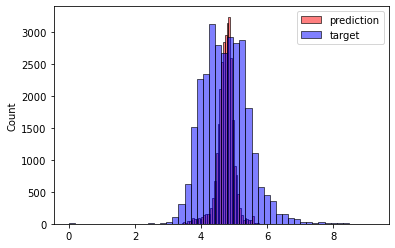

In [250]:
sns.histplot(y_pred, color='red', label = 'prediction', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', label = 'target', alpha=0.5, bins=50)
plt.legend()

<AxesSubplot:ylabel='Count'>

<AxesSubplot:ylabel='Count'>

<AxesSubplot:ylabel='Count'>

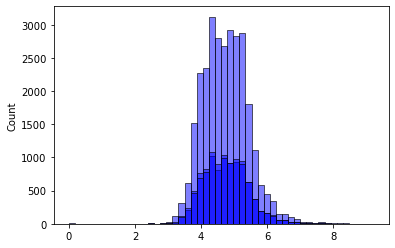

In [251]:
for y in [y_train, y_val, y_test]:
    sns.histplot(y, color='blue', alpha=0.5, bins=50)

Regularization

In [252]:
def train_linear_regression_reg(X, y, r):
    print(f"Training linear regression with regularization for r = {r}.")
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [253]:
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

Training linear regression with regularization for r = 0.01.


0.6557528427418694

In [254]:
def full_model(X, y, r):
    X_train = prepare_X(X, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    rmse_ = rmse(y_val, y_pred)
    # results = dict((name, locals()[name]) for name in [w0, w, rmse_])
    # results = dict((name, locals()[name]) for name in [w0, w, rmse_]) 

    # {k for k in [w0, w, rmse_]}
    return round(rmse_, 2)

In [255]:
for r in r_params:
    full_model(df_train, y_train, r)

Training linear regression with regularization for r = 0.


0.64

Training linear regression with regularization for r = 1e-06.


0.64

Training linear regression with regularization for r = 0.0001.


0.64

Training linear regression with regularization for r = 0.001.


0.64

Training linear regression with regularization for r = 0.01.


0.66

Training linear regression with regularization for r = 0.1.


0.68

Training linear regression with regularization for r = 1.


0.68

Training linear regression with regularization for r = 5.


0.68

Training linear regression with regularization for r = 10.


0.68

So looks like r=0 is enough

### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

In [266]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# seeds = [42]

def prepare_X(df, fill):
    df = df.copy()
    df = df.fillna(fill)
    # print(df.head(20))
    X = df.values
    return X

def train_linear_regression(X, y):
    X = X.values
    print(X)
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def produce_model(X, y):
    w0, w = train_linear_regression(X, y)
    y_pred = w0 + X.dot(w)
    return w0, w, y_pred

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


In [270]:
rmse_list = []

for s in seeds:

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    df_train = df_train.copy()
    df_train['reviews_per_month'] = df_train['reviews_per_month'].fillna(0)
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    datasets = [df_train, df_val, df_test]
    for d in datasets:
        del d['price']
        # d.head()
    w0, w, y_pred = produce_model(df_train, y_train)
    X_val = prepare_X(df_val, 0)
    y_predm = w0 + X_val.dot(w)
    # y_predm
    
    rmse_ = rmse(y_val, y_predm)
    rmse_list.append(rmse_)
    # print(rmse_)

rmse_list

round(np.std(rmse_list), 3)
    
    

[[ 40.7243  -74.0111    3.      ...   0.        1.       42.     ]
 [ 40.72555 -73.99283   1.      ...   0.4       1.       75.     ]
 [ 40.71687 -73.95012   5.      ...   0.35      3.       31.     ]
 ...
 [ 40.76686 -73.98198  30.      ...   0.      121.      345.     ]
 [ 40.69611 -73.97542  30.      ...   0.       25.      333.     ]
 [ 40.76657 -73.98514   3.      ...   1.87      1.      323.     ]]
[[ 40.74596 -73.87762   2.      ...   0.        2.       66.     ]
 [ 40.75883 -73.9216    2.      ...   0.        1.      282.     ]
 [ 40.6967  -73.97477   1.      ...   2.15      1.        0.     ]
 ...
 [ 40.81238 -73.95319   2.      ...   3.16      9.      365.     ]
 [ 40.71399 -73.93798   3.      ...   3.26      1.       98.     ]
 [ 40.70982 -73.95609   2.      ...   4.44      2.       74.     ]]
[[ 4.076060e+01 -7.399345e+01  8.000000e+00 ...  3.000000e-01
   1.000000e+00  1.100000e+01]
 [ 4.073879e+01 -7.398135e+01  2.000000e+00 ...  1.500000e-01
   1.000000e+00  0.000000e+00

[0.6549779961545402,
 0.6462523685884172,
 0.6476558177554858,
 0.6375145069192687,
 0.6445809082722467,
 0.630580999658293,
 0.6297851917613978,
 0.6506184266611098,
 0.6489780353489043,
 0.6437565168224396]

0.008